In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

# DATA UNDERSTANDING

# READ DATA KONFIGURASI

In [2]:
df = pd.read_csv('1703423829.csv')

# Statistik Deskriptif

MELIHAT 10 DATA TERATAS

In [3]:
df.head(11)

,Pelayanan Kesehatan Human Immunodeficiency Virus,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,kode_kabupaten,kode_kecamatan,nama_kabupaten,nama_kecamatan,tahun,jenis_kelamin,keterangan,jumlah_pasien_hiv,satuan
2,3601,3601071,Pandeglang,Angsana,2021,Laki-Laki,Jumlah total,257,orang
3,3601,3601170,Pandeglang,Banjar,2021,Laki-Laki,Jumlah total,326,orang
4,3601,3601090,Pandeglang,Bojong,2021,Laki-Laki,Jumlah total,335,orang
5,3601,3601190,Pandeglang,Cadasari,2021,Laki-Laki,Jumlah total,346,orang
6,3601,3601121,Pandeglang,Carita,2021,Laki-Laki,Jumlah total,316,orang
7,3601,3601030,Pandeglang,Cibaliung,2021,Laki-Laki,Jumlah total,287,orang
8,3601,3601031,Pandeglang,Cibitung,2021,Laki-Laki,Jumlah total,195,orang
9,3601,3601050,Pandeglang,Cigeulis,2021,Laki-Laki,Jumlah total,316,orang


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Pelayanan Kesehatan Human Immunodeficiency Virus  143 non-null    object
 1   Unnamed: 1                                        141 non-null    object
 2   Unnamed: 2                                        141 non-null    object
 3   Unnamed: 3                                        141 non-null    object
 4   Unnamed: 4                                        141 non-null    object
 5   Unnamed: 5                                        141 non-null    object
 6   Unnamed: 6                                        141 non-null    object
 7   Unnamed: 7                                        141 non-null    object
 8   Unnamed: 8                                        141 non-null    object
dtypes: object(9)
memory usage: 70.4+ 

In [5]:
print("\nStatistik Deskriptif:")
df.describe()


Statistik Deskriptif:


,Pelayanan Kesehatan Human Immunodeficiency Virus,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
count,143,141,141,141,141,141,141,141,141
unique,4,36,2,36,2,3,3,125,2
top,3601,3601192,Pandeglang,Koroncong,2021,Laki-Laki,Jumlah total,340,orang
freq,140,4,140,4,140,70,70,3,140


# DATA EXPLORATION

Membuat grafik batang

In [6]:
df.columns = ['kode_kabupaten', 'kode_kecamatan', 'nama_kabupaten', 'nama_kecamatan',
              'tahun', 'jenis_kelamin', 'keterangan', 'jumlah_pasien_hiv', 'satuan']

df_filtered = df[df['keterangan'] == 'Jumlah total']


df_pivot = df_filtered.pivot(index='nama_kecamatan',
                             columns='jenis_kelamin',
                             values='jumlah_pasien_hiv')

df_pivot = df_pivot.rename(columns={
    'Laki-Laki': 'Jumlah_Laki_Laki',
    'Perempuan': 'Jumlah_Perempuan'
})

df_pivot = df_pivot.reset_index()

df_pivot['Jumlah_Total'] = df_pivot['Jumlah_Laki_Laki'] + df_pivot['Jumlah_Perempuan']

df_sorted = df_pivot.sort_values(by='Jumlah_Total', ascending=True)

x = np.arange(len(df_sorted['nama_kecamatan']))
width = 0.4


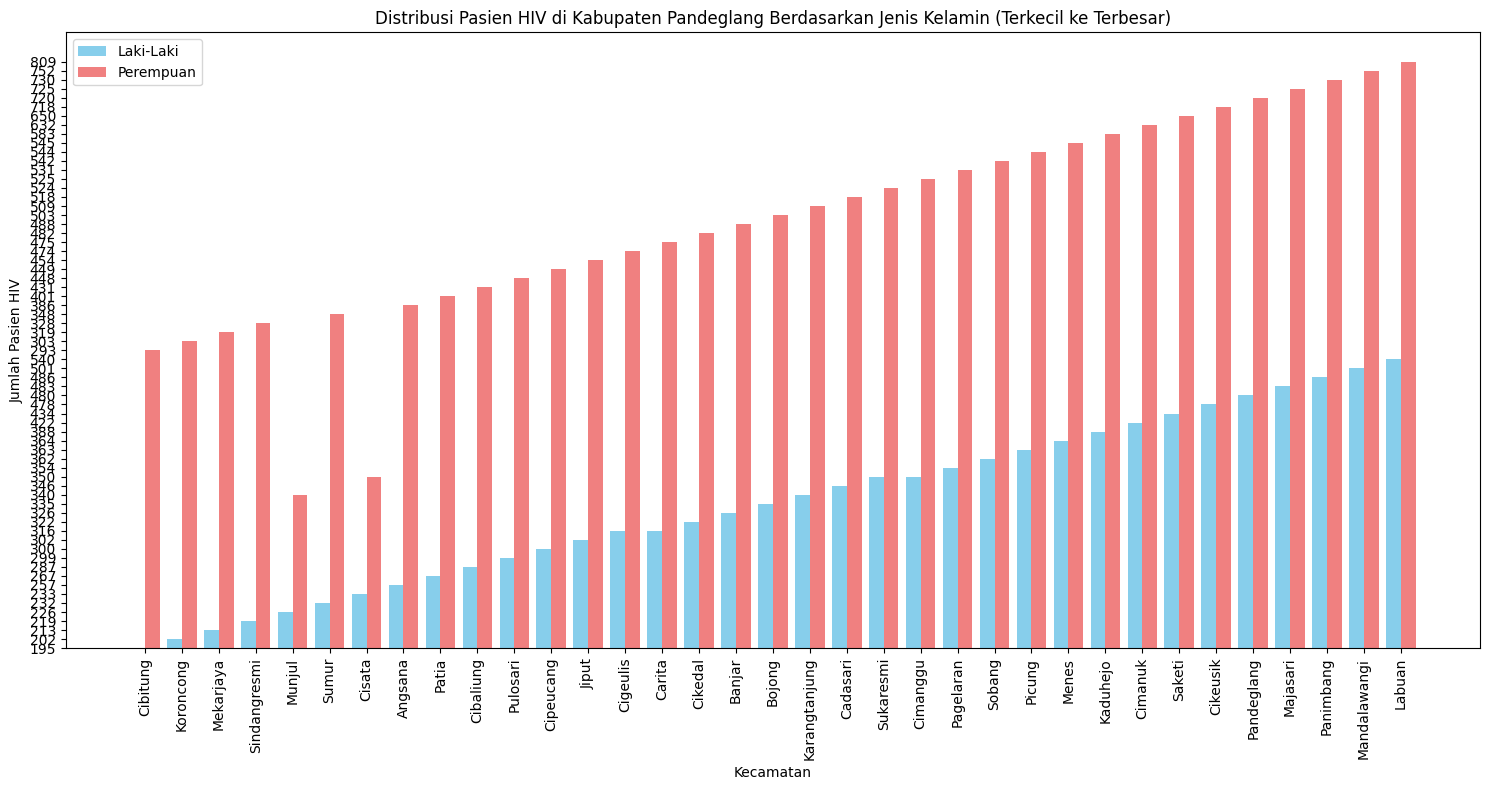

In [7]:
plt.figure(figsize=(15, 8))
plt.bar(x - width/2, df_sorted['Jumlah_Laki_Laki'], width, label='Laki-Laki', color='skyblue')
plt.bar(x + width/2, df_sorted['Jumlah_Perempuan'], width, label='Perempuan', color='lightcoral')
plt.xticks(x, df_sorted['nama_kecamatan'], rotation=90)
plt.title('Distribusi Pasien HIV di Kabupaten Pandeglang Berdasarkan Jenis Kelamin (Terkecil ke Terbesar)')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah Pasien HIV')
plt.legend()
plt.tight_layout()
plt.show()


DATA EXPLORATION

Cek Missing Value

In [8]:
print("\nMissing Value per Kolom:")
df.isna().sum()


Missing Value per Kolom:


kode_kabupaten       856
kode_kecamatan       858
nama_kabupaten       858
nama_kecamatan       858
tahun                858
jenis_kelamin        858
keterangan           858
jumlah_pasien_hiv    858
satuan               858
dtype: int64

Menghitung presentase

In [9]:
missing_percentage = df.isna().mean() * 100
print(missing_percentage)

kode_kabupaten       85.685686
kode_kecamatan       85.885886
nama_kabupaten       85.885886
nama_kecamatan       85.885886
tahun                85.885886
jenis_kelamin        85.885886
keterangan           85.885886
jumlah_pasien_hiv    85.885886
satuan               85.885886
dtype: float64


Mengisi kolom dengan missing value < 20% menggunakan modus

In [10]:
for col in df.columns:
    if df[col].isna().mean() < 0.2:
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df.drop(columns=[col], inplace=True)  # Drop kolom jika missing value > 20%


In [11]:
print("\nMissing Value per Kolom:")
df.isna().sum()


Missing Value per Kolom:


Series([], dtype: float64)

Mengecek jumlah baris duplikat

In [12]:
print("Jumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 0


In [13]:
Lost = df.isnull().sum()
print("Missing data in each colum:")
print(Lost)

Missing data in each colum:
Series([], dtype: float64)


In [14]:
df.drop_duplicates(inplace=True)
print(f"jumlah duplikat setelah perbaikan: {df.duplicated().sum()}")

jumlah duplikat setelah perbaikan: 0


In [15]:
print("\nMissing values setelah perbaikan:\n", df.isnull().sum())


Missing values setelah perbaikan:
 Series([], dtype: float64)


DETEKSI OUTLIER

In [16]:
df = pd.read_csv('1703423829.csv')
new_header = df.iloc[1]
df_cleaned = df[2:]
df_cleaned.columns = new_header

df_cleaned.reset_index(drop=True, inplace=True)

df_cleaned["jumlah_pasien_hiv"] = pd.to_numeric(df_cleaned["jumlah_pasien_hiv"], errors='coerce')

df_cleaned.head()

C:\Users\tufga\AppData\Local\Temp\ipykernel_14904\157562047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["jumlah_pasien_hiv"] = pd.to_numeric(df_cleaned["jumlah_pasien_hiv"], errors='coerce')


1,kode_kabupaten,kode_kecamatan,nama_kabupaten,nama_kecamatan,tahun,jenis_kelamin,keterangan,jumlah_pasien_hiv,satuan
0,3601,3601071,Pandeglang,Angsana,2021,Laki-Laki,Jumlah total,257.0,orang
1,3601,3601170,Pandeglang,Banjar,2021,Laki-Laki,Jumlah total,326.0,orang
2,3601,3601090,Pandeglang,Bojong,2021,Laki-Laki,Jumlah total,335.0,orang
3,3601,3601190,Pandeglang,Cadasari,2021,Laki-Laki,Jumlah total,346.0,orang
4,3601,3601121,Pandeglang,Carita,2021,Laki-Laki,Jumlah total,316.0,orang


In [17]:
import numpy as np

# Hitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = df_cleaned["jumlah_pasien_hiv"].quantile(0.25)
Q3 = df_cleaned["jumlah_pasien_hiv"].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tandai data sebagai outlier jika berada di luar batas
df_cleaned["outlier"] = ((df_cleaned["jumlah_pasien_hiv"] < lower_bound) |
                         (df_cleaned["jumlah_pasien_hiv"] > upper_bound))

# Tampilkan hasil deteksi outlier
df_cleaned[["nama_kecamatan", "jumlah_pasien_hiv", "outlier"]].sort_values(by="jumlah_pasien_hiv", ascending=False).head(10)


C:\Users\tufga\AppData\Local\Temp\ipykernel_14904\914097359.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["outlier"] = ((df_cleaned["jumlah_pasien_hiv"] < lower_bound) |


1,nama_kecamatan,jumlah_pasien_hiv,outlier
114,Cikeusik,992.0,False
125,Mandalawangi,884.0,False
107,Bojong,835.0,False
106,Banjar,830.0,False
88,Labuan,809.0,False
124,Majasari,782.0,False
109,Carita,774.0,False
131,Panimbang,765.0,False
90,Mandalawangi,752.0,False
127,Menes,751.0,False


NORMALISASI DATA

In [18]:
from sklearn.preprocessing import StandardScaler

# Ambil kolom yang akan dinormalisasi
X = df_cleaned[["jumlah_pasien_hiv"]].copy()

# Inisialisasi dan terapkan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tambahkan hasil ke dataframe
df_cleaned["jumlah_pasien_hiv_scaled"] = X_scaled


C:\Users\tufga\AppData\Local\Temp\ipykernel_14904\2216329127.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["jumlah_pasien_hiv_scaled"] = X_scaled


In [19]:
# Hapus baris yang memiliki nilai NaN pada kolom 'jumlah_pasien_hiv'
df_cleaned = df_cleaned.dropna(subset=["jumlah_pasien_hiv"])

# Lakukan kembali normalisasi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned[["jumlah_pasien_hiv"]])

# Jalankan K-Means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned["cluster"] = kmeans.fit_predict(X_scaled)


In [20]:
df_cleaned[["nama_kecamatan", "jumlah_pasien_hiv", "cluster"]].head(10)


1,nama_kecamatan,jumlah_pasien_hiv,cluster
0,Angsana,257.0,2
1,Banjar,326.0,2
2,Bojong,335.0,2
3,Cadasari,346.0,2
4,Carita,316.0,2
5,Cibaliung,287.0,2
6,Cibitung,195.0,2
7,Cigeulis,316.0,2
8,Cikedal,322.0,2
9,Cikeusik,478.0,1


# DATA PREPERATION

In [21]:
new_header = df.iloc[1]
df_clean = df[2:]  # Data dimulai dari baris ke-2 (baris ke-3 di file)
df_clean.columns = new_header

# Reset index
df_clean = df_clean.reset_index(drop=True)

# Mengubah kolom 'jumlah_pasien_hiv' ke tipe numerik
df_clean['jumlah_pasien_hiv'] = pd.to_numeric(df_clean['jumlah_pasien_hiv'], errors='coerce')

In [22]:
# Menghapus baris dengan data kosong atau invalid
df_prep = df_clean.dropna(subset=['jumlah_pasien_hiv', 'nama_kecamatan', 'jenis_kelamin'])

In [23]:
# Membuat pivot table untuk menghitung total pasien per kecamatan (laki-laki + perempuan)
df_pivot = df_prep.pivot_table(
    index=['kode_kecamatan', 'nama_kecamatan'],
    columns='jenis_kelamin',
    values='jumlah_pasien_hiv',
    aggfunc='sum'
).reset_index()


In [24]:
# Mengisi nilai kosong (jika ada) dengan 0 dan membuat kolom total
df_pivot = df_pivot.fillna(0)
df_pivot['total_pasien_hiv'] = df_pivot['Laki-Laki'] + df_pivot['Perempuan']

# Menampilkan data yang telah disiapkan
display(df_pivot.head())

# Menyimpan data yang sudah dipreparasi untuk modeling berikutnya
prepared_file_path = 'prepared_pandeglang_data.csv'
df_pivot.to_csv(prepared_file_path, index=False)
print(f"File data yang sudah dipreparasi disimpan di: {prepared_file_path}")

jenis_kelamin,kode_kecamatan,nama_kecamatan,Laki-Laki,Perempuan,total_pasien_hiv
0,3601010,Sumur,236.0,647.0,883.0
1,3601020,Cimanggu,391.0,1139.0,1530.0
2,3601030,Cibaliung,309.0,804.0,1113.0
3,3601031,Cibitung,214.0,690.0,904.0
4,3601040,Cikeusik,508.0,1710.0,2218.0


File data yang sudah dipreparasi disimpan di: prepared_pandeglang_data.csv


C:\Users\tufga\AppData\Local\Temp\ipykernel_14904\3359258386.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


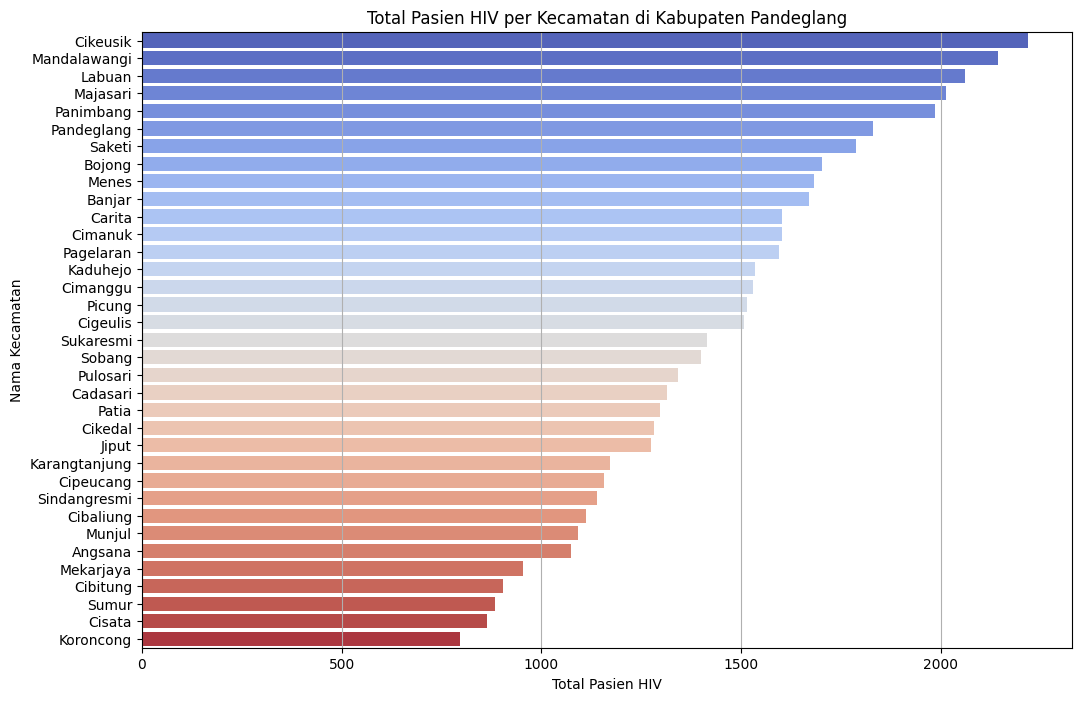

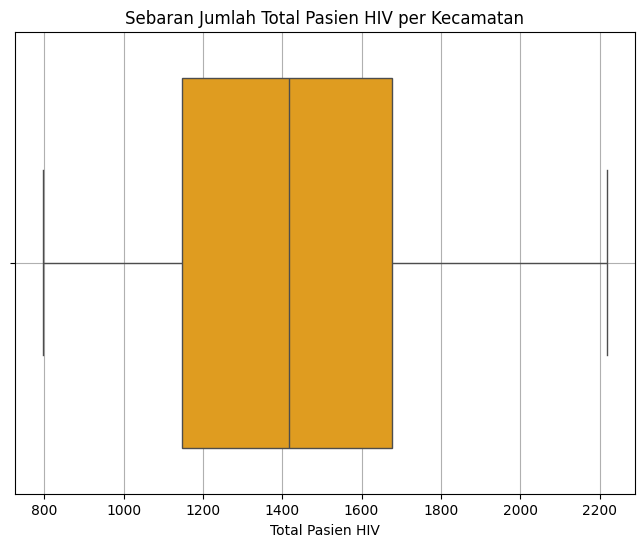

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi bar chart: Total Pasien HIV per Kecamatan
plt.figure(figsize=(12, 8))
sns.barplot(
    x='total_pasien_hiv',
    y='nama_kecamatan',
    data=df_pivot.sort_values('total_pasien_hiv', ascending=False),
    palette='coolwarm'
)
plt.title('Total Pasien HIV per Kecamatan di Kabupaten Pandeglang')
plt.xlabel('Total Pasien HIV')
plt.ylabel('Nama Kecamatan')
plt.grid(axis='x')
plt.show()

# Visualisasi Boxplot: Sebaran Total Pasien HIV
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_pivot['total_pasien_hiv'], color='orange')
plt.title('Sebaran Jumlah Total Pasien HIV per Kecamatan')
plt.xlabel('Total Pasien HIV')
plt.grid(True)
plt.show()

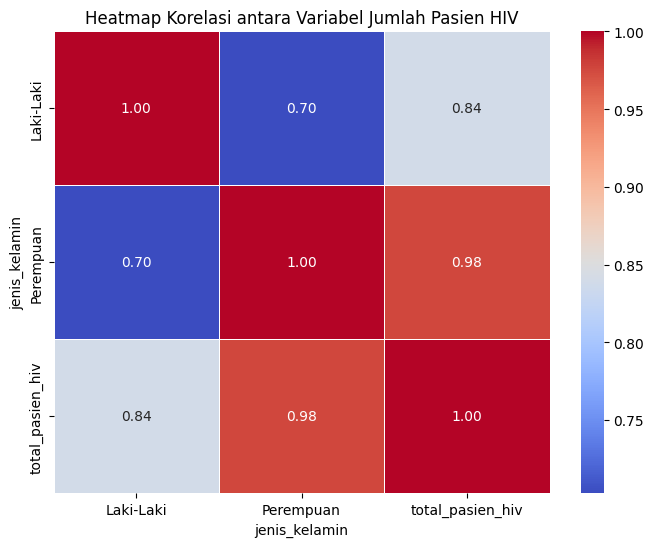

In [26]:
import numpy as np

# Membuat dataframe korelasi untuk variabel numerik
corr_matrix = df_pivot[['Laki-Laki', 'Perempuan', 'total_pasien_hiv']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi antara Variabel Jumlah Pasien HIV')
plt.show()


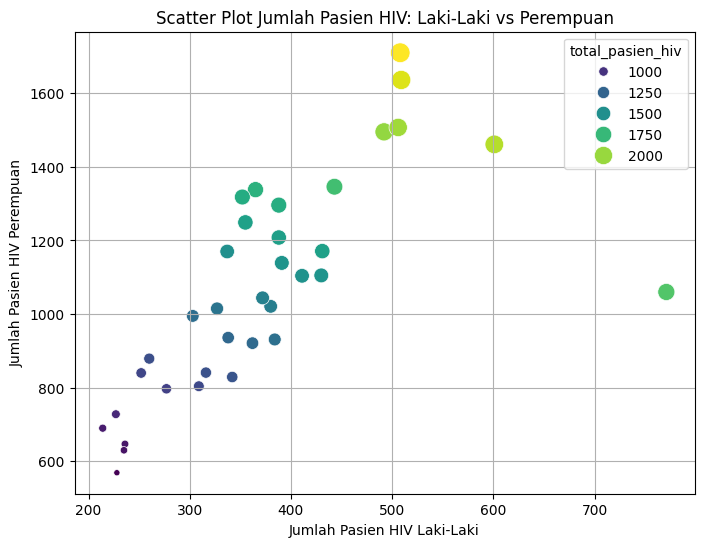

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Laki-Laki',
    y='Perempuan',
    size='total_pasien_hiv',
    sizes=(20, 200),
    hue='total_pasien_hiv',
    palette='viridis',
    data=df_pivot
)
plt.title('Scatter Plot Jumlah Pasien HIV: Laki-Laki vs Perempuan')
plt.xlabel('Jumlah Pasien HIV Laki-Laki')
plt.ylabel('Jumlah Pasien HIV Perempuan')
plt.grid(True)
plt.show()


#Modeling dan Evaluation

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [29]:
# --- Preprocessing Data ---
# Fitur yang digunakan untuk clustering
features = df_pivot[['Laki-Laki', 'Perempuan', 'total_pasien_hiv']]

# Standardisasi data agar skala seragam
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# --- Menentukan Jumlah Cluster Optimal ---
inertia = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))


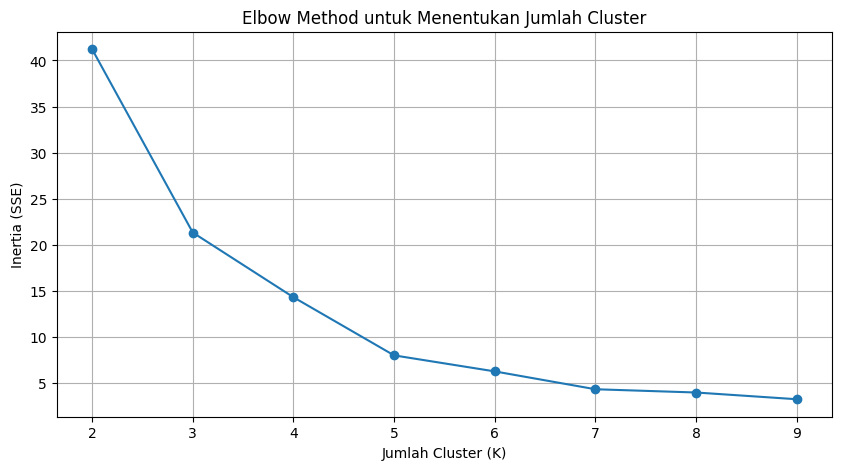

In [30]:
# Visualisasi Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (SSE)')
plt.grid(True)
plt.show()

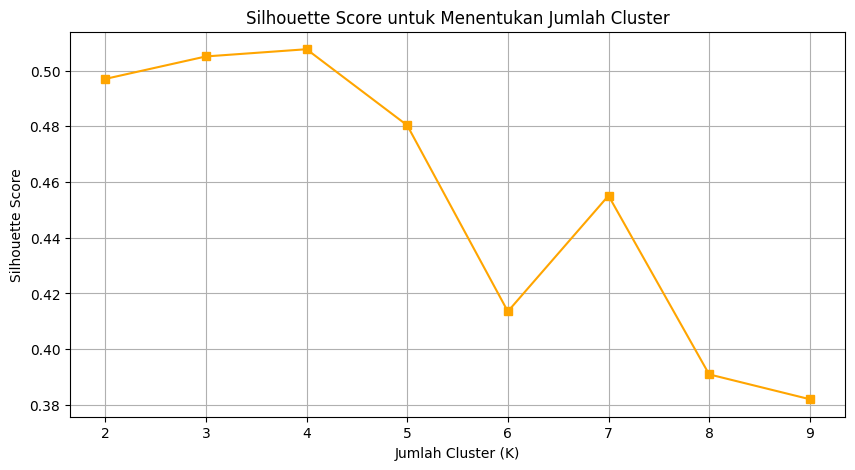

In [31]:
# Visualisasi Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='s', color='orange')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

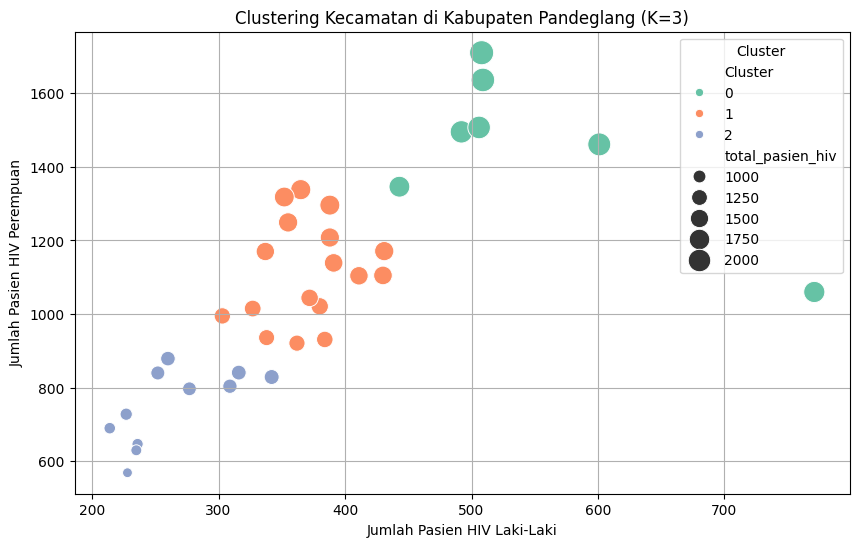

In [32]:
# --- Pilih K optimal (misalnya hasil elbow menunjukkan K=3) ---
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
df_pivot['Cluster'] = kmeans_final.fit_predict(scaled_features)

# --- Visualisasi Hasil Clustering ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Laki-Laki',
    y='Perempuan',
    hue='Cluster',
    palette='Set2',
    size='total_pasien_hiv',
    sizes=(50, 300),
    data=df_pivot
)
plt.title(f'Clustering Kecamatan di Kabupaten Pandeglang (K={optimal_k})')
plt.xlabel('Jumlah Pasien HIV Laki-Laki')
plt.ylabel('Jumlah Pasien HIV Perempuan')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [33]:
# Menampilkan hasil cluster per kecamatan
display(df_pivot[['nama_kecamatan', 'Laki-Laki', 'Perempuan', 'total_pasien_hiv', 'Cluster']].sort_values('Cluster'))

jenis_kelamin,nama_kecamatan,Laki-Laki,Perempuan,total_pasien_hiv,Cluster
31,Majasari,506.0,1507.0,2013.0,0
4,Cikeusik,508.0,1710.0,2218.0,0
6,Panimbang,492.0,1495.0,1987.0,0
30,Pandeglang,771.0,1060.0,1831.0,0
18,Labuan,601.0,1461.0,2062.0,0
24,Mandalawangi,509.0,1636.0,2145.0,0
13,Saketi,443.0,1346.0,1789.0,0
17,Sukaresmi,372.0,1044.0,1416.0,1
23,Pulosari,327.0,1015.0,1342.0,1
22,Menes,388.0,1296.0,1684.0,1


In [34]:
import pandas as pd
import joblib
from sklearn.linear_model import LinearRegression

# Load data CSV
columns = [
    "kode_kabupaten", "kode_kecamatan", "nama_kabupaten", "nama_kecamatan",
    "tahun", "jenis_kelamin", "keterangan", "jumlah_pasien_hiv", "satuan"
]
data = pd.read_csv("1703423829.csv", skiprows=2, names=columns)
data["jumlah_pasien_hiv"] = pd.to_numeric(data["jumlah_pasien_hiv"], errors="coerce")
data = data.dropna(subset=["jumlah_pasien_hiv"])

# Hitung agregasi jumlah laki-laki dan perempuan per kecamatan
agg = data.groupby(['nama_kecamatan', 'jenis_kelamin'])['jumlah_pasien_hiv'].sum().unstack(fill_value=0)
agg = agg.reset_index()
agg.columns.name = None

# Pastikan kolom ada
if 'Laki-Laki' not in agg.columns:
    agg['Laki-Laki'] = 0
if 'Perempuan' not in agg.columns:
    agg['Perempuan'] = 0

# Fitur dan target
X = agg[['Laki-Laki', 'Perempuan']]
y = X.sum(axis=1)  # Target total pasien HIV

# Inisialisasi dan latih model
model = LinearRegression()
model.fit(X, y)

# Simpan model ke model.pkl
joblib.dump(model, "model.pkl")
print("✅ Model telah dilatih ulang dan disimpan ke model.pkl!")


✅ Model telah dilatih ulang dan disimpan ke model.pkl!


In [35]:
pip install pyngrok

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
!ngrok config add-authtoken 2woyAIreZD0FrH5bOQKw1fDmswn_gUMtbwjyG7XG9esjaLBX

Authtoken saved to configuration file: C:\Users\tufga\AppData\Local/ngrok/ngrok.yml


In [37]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
%%writefile app.py

# app.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# Konfigurasi halaman
st.set_page_config(
    page_title="Dashboard Prediksi Jumlah Pasien HIV",
    page_icon="🧬",
    layout="wide",
)

# Load model
model = joblib.load("model.pkl")

# Title halaman
st.title("🧬 Dashboard Prediksi Jumlah Pasien HIV")

# Load data
columns = [
    "kode_kabupaten", "kode_kecamatan", "nama_kabupaten", "nama_kecamatan",
    "tahun", "jenis_kelamin", "keterangan", "jumlah_pasien_hiv", "satuan"
]
data = pd.read_csv("1703423829.csv", skiprows=2, names=columns)
data["jumlah_pasien_hiv"] = pd.to_numeric(data["jumlah_pasien_hiv"], errors="coerce")
data = data.dropna(subset=["jumlah_pasien_hiv"])

# Hitung agregasi
total_data = data.groupby(['nama_kecamatan', 'jenis_kelamin'])['jumlah_pasien_hiv'].sum().reset_index()
total_kecamatan = data.groupby('nama_kecamatan')['jumlah_pasien_hiv'].sum().sort_values(ascending=False)

# Pivot data untuk evaluasi model
X_agg = total_data.pivot(index='nama_kecamatan', columns='jenis_kelamin', values='jumlah_pasien_hiv').fillna(0)
for gender in ['Laki-Laki', 'Perempuan']:
    if gender not in X_agg.columns:
        X_agg[gender] = 0
X_agg = X_agg[['Laki-Laki', 'Perempuan']]

# Evaluasi model
st.markdown("---")
st.subheader("📈 Evaluasi Model")
if not X_agg.empty:
    y_true = X_agg.sum(axis=1)
    y_pred = model.predict(X_agg)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    col1, col2 = st.columns(2)
    with col1:
        st.success(f"MAE (Mean Absolute Error): **{mae:.2f}**")
    with col2:
        st.info(f"R² Score: **{r2:.2f}**")
else:
    st.warning("Data agregasi kosong. Tidak dapat mengevaluasi model.")

# Visualisasi
st.markdown("---")
st.subheader("📊 Visualisasi Data")
visual_choice = st.selectbox(
    "Pilih Visualisasi:",
    ["Bar Chart per Kecamatan", "Pie Chart Gender", "Top 5 Kecamatan", "Data Lengkap per Kecamatan"]
)

if visual_choice == "Bar Chart per Kecamatan":
    st.write("### Jumlah Pasien HIV per Kecamatan")
    fig1, ax1 = plt.subplots(figsize=(12, 6))
    total_kecamatan.plot(kind='bar', ax=ax1, color='skyblue')
    ax1.set_ylabel("Jumlah Pasien HIV")
    ax1.set_title("Total Pasien HIV per Kecamatan")
    st.pyplot(fig1)

elif visual_choice == "Pie Chart Gender":
    st.write("### Distribusi Gender Pasien HIV")
    total_gender = data.groupby('jenis_kelamin')['jumlah_pasien_hiv'].sum()
    fig2, ax2 = plt.subplots()
    ax2.pie(total_gender, labels=total_gender.index, autopct='%1.1f%%', startangle=90, colors=['#3498db', '#e74c3c'])
    ax2.axis('equal')
    ax2.set_title("Distribusi Pasien HIV berdasarkan Gender")
    st.pyplot(fig2)

elif visual_choice == "Top 5 Kecamatan":
    st.write("### Top 5 Kecamatan dengan Jumlah Pasien HIV Terbanyak")
    top5_kecamatan = total_kecamatan.head(5).reset_index()
    st.table(top5_kecamatan)

elif visual_choice == "Data Lengkap per Kecamatan":
    selected_kecamatan = st.selectbox("Pilih Kecamatan", sorted(data['nama_kecamatan'].unique()))
    filtered_data = data[data['nama_kecamatan'] == selected_kecamatan]
    st.write(f"### Data Lengkap untuk Kecamatan: **{selected_kecamatan}**")
    st.dataframe(filtered_data)

# Pencarian Sederhana
st.markdown("---")
st.subheader("🔍 Pencarian Data Pasien HIV Berdasarkan Gender")

# Filter berdasarkan jenis kelamin saja
gender_filter = st.selectbox("Pilih Jenis Kelamin", sorted(data['jenis_kelamin'].unique()))
filtered_gender = data[data['jenis_kelamin'] == gender_filter]

if not filtered_gender.empty:
    result = filtered_gender.groupby('nama_kecamatan')['jumlah_pasien_hiv'].sum().reset_index()
    st.write(f"### Hasil Pencarian: Jenis Kelamin **{gender_filter}**")
    st.dataframe(result)
else:
    st.warning("Data tidak ditemukan untuk gender ini.")

# Form prediksi interaktif
st.markdown("---")
st.subheader("🔮 Prediksi Jumlah Total Pasien HIV")
with st.form("prediction_form"):
    jumlah_laki = st.number_input("Jumlah Pasien Laki-Laki", min_value=0, step=1)
    jumlah_perempuan = st.number_input("Jumlah Pasien Perempuan", min_value=0, step=1)
    submit = st.form_submit_button("Prediksi Total Pasien HIV")

if submit:
    X_new = np.array([[jumlah_laki, jumlah_perempuan]])
    prediksi = model.predict(X_new)[0]
    st.success(f"Prediksi Jumlah Total Pasien HIV: **{prediksi:.0f}**")

# Simulasi Dampak Pencegahan
st.markdown("---")
st.subheader("🧪 Simulasi Dampak Pencegahan HIV")

# Hitung tren tahunan
trend_data = data.groupby('tahun')['jumlah_pasien_hiv'].sum().reset_index()

# Slider untuk skenario pengurangan
reduction_percent = st.slider(
    "Proyeksi Pengurangan Kasus HIV (%) karena Pencegahan",
    min_value=0, max_value=100, value=10, step=5
)

# Simulasi pengurangan
trend_data['setelah_pencegahan'] = trend_data['jumlah_pasien_hiv'] * (1 - reduction_percent / 100)

# Visualisasi
fig3, ax3 = plt.subplots()
ax3.plot(trend_data['tahun'], trend_data['jumlah_pasien_hiv'], label='Kasus Aktual', marker='o', color='red')
ax3.plot(trend_data['tahun'], trend_data['setelah_pencegahan'], label=f'Skenario Setelah Pencegahan ({reduction_percent}%)', marker='o', color='green')
ax3.set_xlabel("Tahun")
ax3.set_ylabel("Jumlah Pasien HIV")
ax3.set_title("Simulasi Dampak Pencegahan Terhadap Jumlah Kasus HIV")
ax3.legend()
st.pyplot(fig3)


Overwriting app.py


In [39]:
from pyngrok import ngrok
import threading
import time
import os

In [40]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")

t=2025-05-30T21:32:56+0700 lvl=warn msg="failed to check for update" obj=updater err="Post \"https://update.equinox.io/check\": context deadline exceeded"
t=2025-05-30T21:33:01+0700 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com: i/o timeout"


Streamlit app is live at: NgrokTunnel: "https://19cf-2001-448a-3024-2c54-9ba-6d4a-4aad-7a85.ngrok-free.app" -> "http://localhost:8501"
